In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer,

In [2]:
!ls

dataset.csv  Untitled.ipynb


In [3]:
df=pd.read_csv('dataset.csv',header=0)

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [30]:
# Step 1 - Seperate Data and Target
Step 1.5 - Correlation
# Step 2- Dummies
# Step 3 - df.hist() Scale Data
# Feature Importance

df,target=df.drop(['target'],axis=1),df['target']

In [ ]:
scaler=StandardScaler()
scaler.fit(dataframe)

In [62]:
features_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataframe[features_to_scale]=scaler.transform(dataframe[features_to_scale])

NameError: name 'scaler' is not defined

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
## Check if any null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [83]:
FutureWarning

FutureWarning

In [81]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

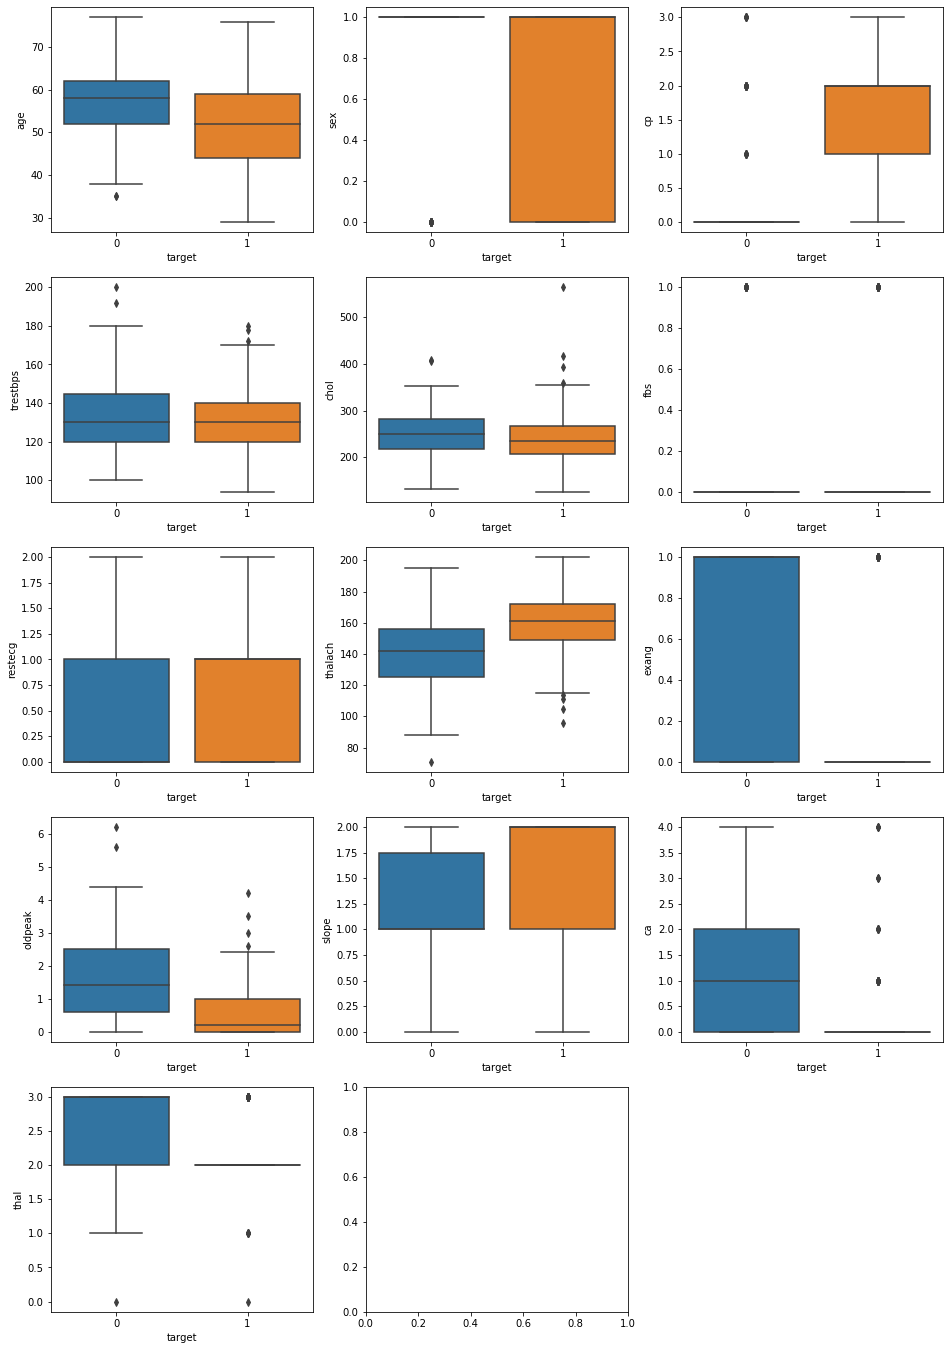

In [25]:
plt.figure(figsize=[16,24])
for i,col in enumerate(df.columns):
    plt.subplot(5,3,i+1)
    if col!='target':
        sns.boxplot(df['target'],df[col])

In [31]:
mut=feature_selection.mutual_info_classif(df,target)

In [34]:
pd.DataFrame({'colums':df.columns,'scores':mut}).sort_values(['scores'],ascending=False)

,colums,scores
11,ca,0.158467
10,slope,0.148914
2,cp,0.145804
12,thal,0.137402
4,chol,0.098579
8,exang,0.095725
9,oldpeak,0.092858
7,thalach,0.091022
1,sex,0.050025
0,age,0.020688


In [42]:
for col in df.columns:
    print(col,'--',len(df[col].value_counts()))

age -- 41
sex -- 2
cp -- 4
trestbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalach -- 91
exang -- 2
oldpeak -- 40
slope -- 3
ca -- 5
thal -- 4


In [43]:
discrete_features=[False,True,True,False,False,True,True,False,True,False,True,True,True]

In [45]:
mut2=feature_selection.mutual_info_classif(df,target,discrete_features=discrete_features)

In [51]:
impfeaturesdf=pd.DataFrame({'columns':df.columns,'scores':mut2}).sort_values(['scores'],ascending=False)
impfeaturescols=impfeaturesdf['columns'].values
impfeaturescols

array(['thal', 'cp', 'ca', 'oldpeak', 'exang', 'chol', 'slope', 'thalach',
       'sex', 'restecg', 'trestbps', 'fbs', 'age'], dtype=object)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25)

In [53]:
for i in range(len(impfeaturescols)):
    columns=impfeaturescols[:i+1]
    lr=LogisticRegression()
    lr.fit(X_train[columns],y_train)
    print(columns)
    print(lr.score(X_test[columns],y_test))
    print('\n')

['thal']
0.7631578947368421


['thal' 'cp']
0.7368421052631579


['thal' 'cp' 'ca']
0.8289473684210527


['thal' 'cp' 'ca' 'oldpeak']
0.7894736842105263


['thal' 'cp' 'ca' 'oldpeak' 'exang']
0.8026315789473685


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol']
0.8026315789473685


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol' 'slope']
0.8157894736842105


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol' 'slope' 'thalach']
0.8157894736842105


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol' 'slope' 'thalach' 'sex']
0.8157894736842105


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol' 'slope' 'thalach' 'sex'
 'restecg']
0.7894736842105263


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol' 'slope' 'thalach' 'sex'
 'restecg' 'trestbps']
0.8157894736842105


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol' 'slope' 'thalach' 'sex'
 'restecg' 'trestbps' 'fbs']
0.8157894736842105


['thal' 'cp' 'ca' 'oldpeak' 'exang' 'chol' 'slope' 'thalach' 'sex'
 'restecg' 'trestbps' 'fbs' 'age']
0.7894736842105263




/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer,OneHotEncoder

In [ ]:
OneHotEncoder()

In [66]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [126]:
coltrf=ColumnTransformer(
    [('scaler',Normalizer(),['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
     ('onehot',OneHotEncoder(),['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
    ],
    remainder='passthrough'
)

In [127]:
coltrf.fit(df)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler', Normalizer(copy=True, norm='l2'),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak']),
                                ('onehot',
                                 OneHotEncoder(categorical_features=None,
                                               categories=None, drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               n_values=None, sparse=True),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])],
                  verbose=False)

In [133]:
pd.Index()

TypeError: Index(...) must be called with a collection of some kind, None was passed

In [130]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [131]:
get_feature_names(coltrf)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer scaler (type Normalizer) does not provide get_feature_names. Will return input column names if available


['scaler__age',
 'scaler__trestbps',
 'scaler__chol',
 'scaler__thalach',
 'scaler__oldpeak',
 'onehot__x0_0.0',
 'onehot__x0_1.0',
 'onehot__x1_0.0',
 'onehot__x1_1.0',
 'onehot__x1_2.0',
 'onehot__x1_3.0',
 'onehot__x2_0.0',
 'onehot__x2_1.0',
 'onehot__x3_0.0',
 'onehot__x3_1.0',
 'onehot__x3_2.0',
 'onehot__x4_0.0',
 'onehot__x4_1.0',
 'onehot__x5_0.0',
 'onehot__x5_1.0',
 'onehot__x5_2.0',
 'onehot__x6_0.0',
 'onehot__x6_1.0',
 'onehot__x6_2.0',
 'onehot__x6_3.0',
 'onehot__x6_4.0',
 'onehot__x7_0.0',
 'onehot__x7_1.0',
 'onehot__x7_2.0',
 'onehot__x7_3.0']

In [79]:
coltrf.transform(df,)

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

In [90]:
from sklearn import pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [88]:
pipe=pipeline.Pipeline(
[
    ('feature_selector',SelectKBest(mutual_info_classif,k=8)),
    ('classifier',LogisticRegression())
]
)

In [96]:
search_space=[
    {
        'feature_selector__k':[3,5,8],
        'classifier':[LogisticRegression()],
        'classifier__C':[0.1,0.3]
        
    }
]

In [104]:
cv=GridSearchCV(pipe,search_space,cv=10,verbose=2)

In [105]:
cv=cv.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=3 
[CV]  classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=3, total=   0.1s
[CV] classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=3, total=   0.0s
[CV] classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=3 
[CV]  classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, pe

[CV]  classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=5, total=   0.0s
[CV] classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=5 
[CV]  classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, pe

[CV]  classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=8, total=   0.0s
[CV] classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.1, feature_selector__k=8 
[CV]  classifier=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, pe

[CV]  classifier=LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.3, feature_selector__k=5, total=   0.0s
[CV] classifier=LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.3, feature_selector__k=5 
[CV]  classifier=LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, pe

[CV]  classifier=LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.3, feature_selector__k=8, total=   0.0s
[CV] classifier=LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=0.3, feature_selector__k=8 
[CV]  classifier=LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, pe

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.4s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [106]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [107]:
cv.best_params_

{'classifier': LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 0.3,
 'feature_selector__k': 8}

In [108]:
cv.best_estimator_

Pipeline(memory=None,
         steps=[('feature_selector',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x7f1f7e9fb598>)),
                ('classifier',
                 LogisticRegression(C=0.3, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [109]:
cv.best_score_

0.8281938325991189

In [110]:
cv.score(X_test,y_test)

0.8157894736842105

In [116]:
cv.best_estimator_[1].coef_

array([[-0.95479049,  0.79988722,  0.00428586, -0.71226234, -0.57111575,
         0.8826175 , -0.76634444, -0.39019482]])

In [119]:
X_train.columns[cv.best_estimator_[0].get_support()]

Index(['sex', 'cp', 'trestbps', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

In [135]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])